## Importing Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

## Loading Data

In [2]:
data = pd.read_csv("E:\Linear Regression\train.csv")

**A little bit of data exploration**

In [3]:
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.0 KB


## Data Preprocessing

#### Handling NULL Value

In [5]:
data = data.dropna()
print("Shape of the dataset = {}".format(data.shape))

Shape of the dataset = (699, 2)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


#### Splitting data

In [7]:
# training dataset and labels
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output  = np.array(data.y[0:500]).reshape(500,1)

# valid dataset and labels
test_input = np.array(data.x[500:700]).reshape(199,1)
test_output  = np.array(data.y[500:700]).reshape(199,1)


# 1) we have train input with the corresponding train output
# 2) then we have test output which our machine learning model predict and compare to test input values 

# print the shapes
print("Train Input Shape = {}".format(train_output.shape))
print("Train Output  Shape = {}".format(train_output.shape))
print("Test Input Shape = {}".format(test_input.shape))
print("Test Output  Shape = {}".format(test_output.shape))

Train Input Shape = (500, 1)
Train Output  Shape = (500, 1)
Test Input Shape = (199, 1)
Test Output  Shape = (199, 1)


# <font color = "green">Linear Regression</font>

Linear regression is a statistical approach for modelling relationship between a dependent variable with a given set of independent variables.

Simple linear regression is an approach for predicting a response using a single feature.

1) In ML, cost functions are used to estimate how badly models are performing. Put simply, a cost function is a measure of how wrong the model is in terms of its ability to estimate the relationship between X and y. This is typically expressed as a difference or distance between the predicted value and the actual value.

4) It has the hypothesis Hy , we give m and c values randomly , it finds the cost function.

5) We have to reduce the cost function by again updating the m and c values. 

6) Initially, we have given random m and c values, but when we keep on training our model this hypothesis will fix to a position where we have the most optimal values of m and c.

7) It means that the more the lesser the cost function would be , the better the performance of linear regression model would be.

8) Our target is to decrease this cost value and accurately predict the value. Our main aim is to find the hypothesis value or the best fit line so that the distanc between our predicted value and he actual output will be least. So, that we can predict our value of input very acurately.

6) And how to update m and c values?? To update m and c values, we have a very important concept called Gradient Descent Algorithm.

# Train the Data

## Sequence of Steps:

* Forward Propagtaion 

* Cost Function 

* Backward Propagation 

* Update Parameters 

## Forward Propogation

**f(x) = m*x + c** ; where m and c are the parameters that or model will learn through training.

In [8]:
#here, we have to build the hypothysis y = mx + c
def forward_propagation(train_input, parameters):
    m = parameters['m']
    c = parameters['c']
    predictions = np.multiply(m, train_input) + c
    return predictions

## Defining Cost Function

**Mean Squared Error, Cost = [(y - f(x)) ^ 2] * 0.5**


       n is the number of entries

       y hat is predicted values
       
       y are output values or actual train output values
       
       1/2 can be written as 0.5

In [1]:
def cost_function(predictions, train_output):
    cost = np.mean((predictions - train_output) ** 2) * 0.5
    return cost

## Gradient Descent for Backpropagation

Cost Function:

alpha value is very important.

1) if we have alpha with large value then it will directly jump form one place to another , it will keep on moving but wont reach an optimal value.

2) if alpha is too small, then it move from one place to another in a slow pace and take higher time to reach optimal value.
    
3) So, it is very important that we choose our alpha value very carefully so as to reach and reduce our cost function very efficiently.

Gradient Descent:

1) We have our function y = mx + c. But we want to have the most optimal value of m and c. But how? For that we have to find the new m and c value.

2) Update the new parameters = new m = m - alpha del cost/ del m . This is  backward propogation.

3) Then calculate new c value too.

4) After finding the new m and c values, we have to update with the new m values and new c values.

5) So, we have FP where we solve y = mx + c

6) Then we predict y value and find the Cost function

7) We want to reduce cost funciton,so we use BP where we use Gradient Descent 

8) Using this result we update our parameter.

9) This process continues, untill we find the most optimal values of m and c untill we find the best hypothesis is ready mx + c and when we feed any data to x , then it will predict our output value for this.

10) This is how our Linear Regression model works.

# Using Chain Rule
- cost
- f = f(x)

Partial Derivative of cost function w.r.t m i.e. dcost/dm

**dcost/dm = dcost/df * df/dm **

Partial Derivative of cost function w.r.t c i.e. dcost/dc

**dcost/dc = dcost/df * df/dc **

<u>Partial Derivatives:</u>

- dc/df = (y - f) * -1
- df/dw = x
- df/db = 1

Here, dcost/dm and dcost/dc are Backward propogation

In [10]:
# df = (y hat - y)
# dm = df/n * x
# dc = df/n * 1 

def backward_propagation(train_input, train_output, predictions):
    derivatives = dict()
    df = (train_output - predictions) * -1      # (df = yhat - y)
    dm = np.mean(np.multiply(train_input, df))  # (dm = df / n * x)
    dc = np.mean(df)                            # (dc = df / n * 1)
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    return derivatives

## Update the Parameters

- m = m - (learning_rate * dm)
- c = c - (learning_rate * dc)

In [11]:
#parameter:m and c, derivatives : dm and dc, learning_rate : alpha

def update_parameters(parameters, derivatives, learning_rate):
    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']
    return parameters

## Train the Data

Sequence of Steps:

- Forward Propagtaion
- Cost Function
- Backward Propagation
- Update Parameters

In [12]:
def train(train_input, train_output, learning_rate, iters):
    
    #random parameters
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1) * -1
    parameters["c"] = np.random.uniform(0,1) * -1
    
    plt.figure()
    
    #loss
    loss = list()
    
    #iterate
    for i in range(iters):
        
        #forward propagation
        predictions = forward_propagation(train_input, parameters)
        
        #cost function
        cost = cost_function(predictions, train_output)
        
        #append loss and print
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))
        
        #plot function
        fig, ax = plt.subplots()
        
        ax.plot(train_input, train_output, '+', label='Original')
        ax.plot(train_input, predictions, '*', label='Training')

        legend = ax.legend()
        
        plt.plot(train_input, train_output, '+')
        plt.plot(train_input, predictions, '*')        
        
        plt.show()
        
        #back propagation
        derivatives = backward_propagation(train_input, train_output, predictions)
        
        #update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)
        
    return parameters, loss

## Training

Iteration = 1, Loss = 4348.135171772838


<Figure size 432x288 with 0 Axes>

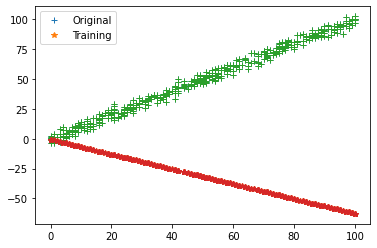

Iteration = 2, Loss = 1974.9138716845523


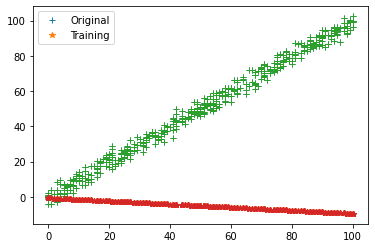

Iteration = 3, Loss = 898.1807379527228


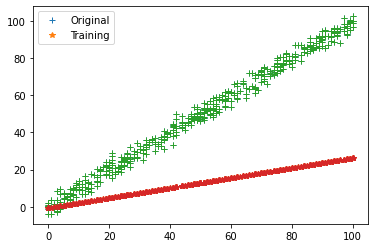

Iteration = 4, Loss = 409.665721340605


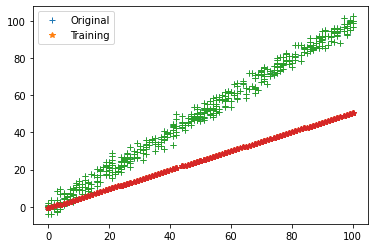

Iteration = 5, Loss = 188.02591600039045


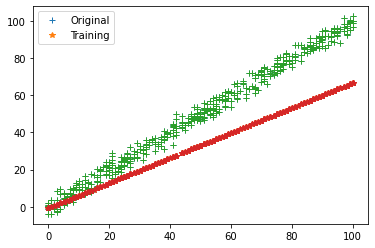

Iteration = 6, Loss = 87.46768961628209


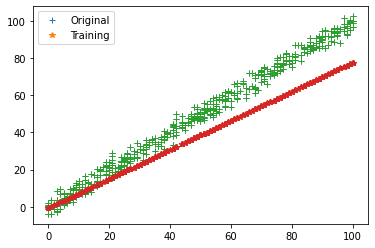

Iteration = 7, Loss = 41.8443097195668


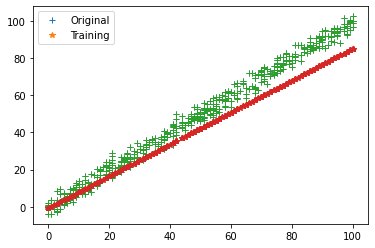

Iteration = 8, Loss = 21.144930522342527


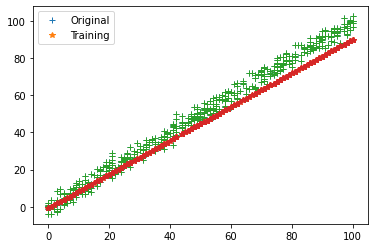

Iteration = 9, Loss = 11.753598049388351


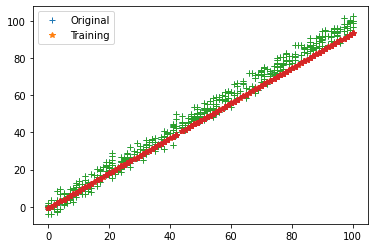

Iteration = 10, Loss = 7.492738900554732


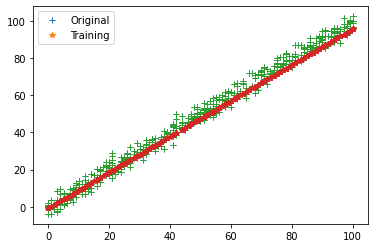

Iteration = 11, Loss = 5.559581181658968


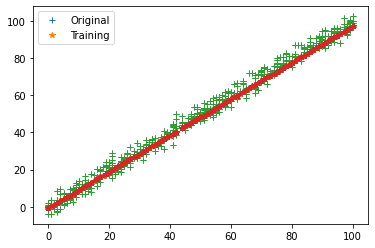

Iteration = 12, Loss = 4.68250417984466


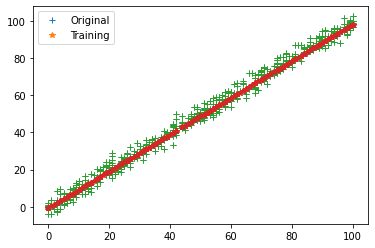

Iteration = 13, Loss = 4.284572169189359


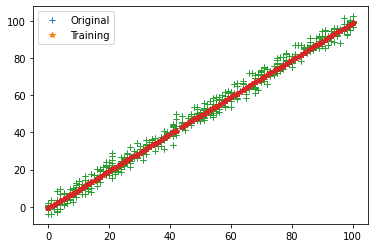

Iteration = 14, Loss = 4.104028771804258


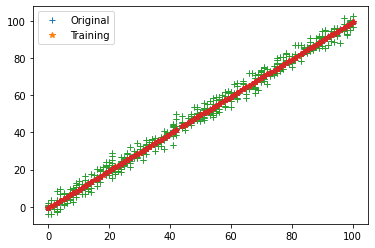

Iteration = 15, Loss = 4.022114829109069


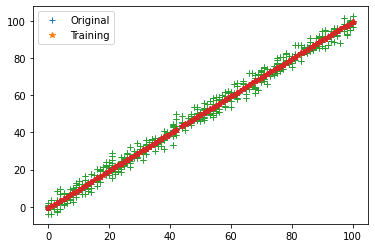

Iteration = 16, Loss = 3.984949179313341


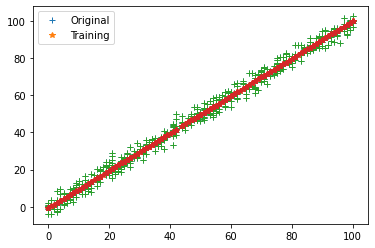

Iteration = 17, Loss = 3.9680858796317735


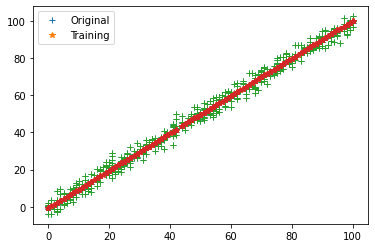

Iteration = 18, Loss = 3.960433778745327


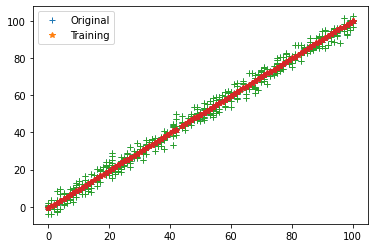

Iteration = 19, Loss = 3.9569608090155355


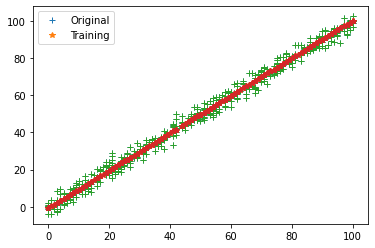

Iteration = 20, Loss = 3.9553839157811006


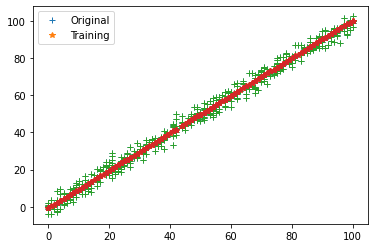

In [13]:
parameters, loss = train(train_input, train_output, 0.0001, 20)

In [14]:
print(parameters)

{'m': 1.0093160794418703, 'c': -0.8251391488125026}


## Let's Predict

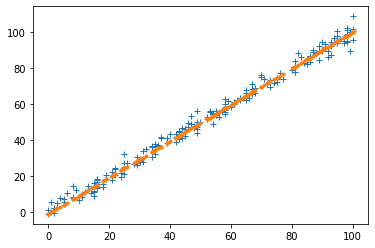

In [15]:
test_predictions = test_input * parameters["m"] + parameters["c"]
plt.figure()
plt.plot(test_input, test_output, '+')
plt.plot(test_input, test_predictions, '.')
plt.show()

## Cost for test data

In [16]:
cost_function(test_predictions, test_output)

4.134315039154307